The required imports and some initializations.

In [1]:
from google_analytics import *

# Define the auth scopes to request.
scope = ['https://www.googleapis.com/auth/analytics.readonly']

# Use the developer console and replace the values with your
# service account email and relative location of your key file.
key_file_location = get_service_key_path('example')

# Authenticate and construct service.
service = get_service('analytics', 'v3', scope, key_file_location)
experiments = get_experiments(service)

# Retrieve information
var_names = {}
for exp in experiments['items']:
    exp_id = str(exp['id'])
    var_names[exp_id] = [str(item['name']) for item in exp['variations']]
print 'variations', var_names

account 5318270
property <type 'property'>
profile 120892623
variations {'x8DtGwZYTyq2eWG8m5UK7Q': ['0-0-2-2-2-0-2-0', '1-0-1-1-0-1-0-0', '0-1-2-2-1-2-2-1', '1-1-3-0-0-1-0-1', '1-0-3-0-0-2-1-1'], 'r9vplR-kQ8aZ1TsK8ZmbbQ': ['0-0-2-2-2-0-2-0', '0-0-2-2-2-1-0-0', '1-0-1-1-0-0-2-0'], 'QHECYoMqQ1CrrHcIF_D50w': ['0-0-2-2-2-0-2-0', '1-0-3-0-0-2-0-1'], 'CYvpnCUtTPWx9ZfxZYlUow': ['0-0-2-2-2-0-2-0', '0-0-2-1-0-0-2-0', '1-0-1-2-2-1-0-0'], 'zQYn4S5ZR1mDiD75IC22KA': ['0-0-2-2-2-0-2-0', '1-1-2-1-1-2-1-1', '1-1-3-1-1-2-2-0', '1-0-1-1-0-0-2-1', '1-0-1-1-1-2-0-1']}


Starting from a certain point in time, retrieve per-day data and store it in memory.

In [21]:
import datetime

data = {}
date = datetime.datetime.strptime('2016-04-25', "%Y-%m-%d")
profile = get_first_profile_id(service)

for i in range(15):
    datestr = date.strftime('%Y-%m-%d')
    date += datetime.timedelta(hours=1)

    results = get_results(service, profile, metrics='ga:exitRate,ga:sessions', dimensions='ga:experimentVariant,ga:experimentId', start_date=datestr, end_date=datestr)
    for row in results['rows']:
        exp_var, exp_id, bounce_rate,sessions = row
        exp_id = str(exp_id)
        bounce_rate = float(bounce_rate) / 100.
        if exp_id not in data:
            data[exp_id] = {}
        exp_var = var_names[exp_id][int(exp_var)]
        if exp_var not in data[exp_id]:
            data[exp_id][exp_var] = {
                'dates': [],
                'data': [],
                'sessions': []
            }
        data[exp_id][exp_var]['dates'].append(date)
        data[exp_id][exp_var]['data'].append(bounce_rate)
        data[exp_id][exp_var]['sessions'].append(sessions)

account 5318270
property <type 'property'>
profile 120892623


Give some insights per experiment. It will display the number of datapoints per variation per experiment.

In [22]:
for experiment in data:
    for variation in data[experiment]:
        print(experiment, variation, len(data[experiment][variation]['dates']))

('zQYn4S5ZR1mDiD75IC22KA', '1-1-2-1-1-2-1-1', 15)
('zQYn4S5ZR1mDiD75IC22KA', '1-0-1-1-1-2-0-1', 15)
('zQYn4S5ZR1mDiD75IC22KA', '0-0-2-2-2-0-2-0', 15)
('zQYn4S5ZR1mDiD75IC22KA', '1-0-1-1-0-0-2-1', 15)
('zQYn4S5ZR1mDiD75IC22KA', '1-1-3-1-1-2-2-0', 15)


Make the plots!

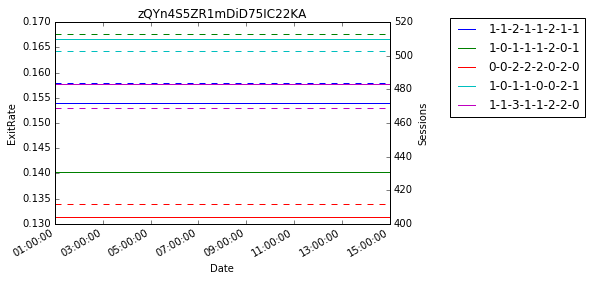

In [23]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
% matplotlib inline

for experiment in data:
    fig, ax = plt.subplots()
    ax.fmt_xdata = DateFormatter('%Y-%m-%d')
    for variation in data[experiment]:
        ax.plot(data[experiment][variation]['dates'], data[experiment][variation]['data'], label=variation)
    ax.set_ylabel('ExitRate')
    ax.set_xlabel('Date')
    ax.set_title(experiment)
    bx = ax.twinx()
    for variation in data[experiment]:
        bx.plot(data[experiment][variation]['dates'], data[experiment][variation]['sessions'], label=variation, ls='--')
    bx.set_ylabel('Sessions')
    fig.autofmt_xdate()
    ax.legend(bbox_to_anchor=(1.6, 1.05))
    plt.show()